In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Getting the CSV file using pandas
df=pd.read_csv('C:/Users/Erick/Desktop/My documents/jobs_in_data.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


The no missing values in our data set

In [3]:
#Checking any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
#Top ten rows of our data set
top=df.head(10)
top.shape,len(top)

((10, 12), 10)

In [5]:
#Last ten rows of our data set
last=df.tail(10)
last.shape,len(last)

((10, 12), 10)

In [6]:
# Summary of our data set using method describe
summary=df.describe()
summary

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [7]:
# Filter based on data scientist title and saving it as csv file to be used later
jobtitle=df[df['job_title']=='Data Scientist']
jobtitle.to_csv('data_scientist.csv',index=False)

In [8]:
# Determining the counts of job title using method value_counts()
common_job_titles=df['job_title'].value_counts().head()
common_job_titles

job_title
Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
Name: count, dtype: int64

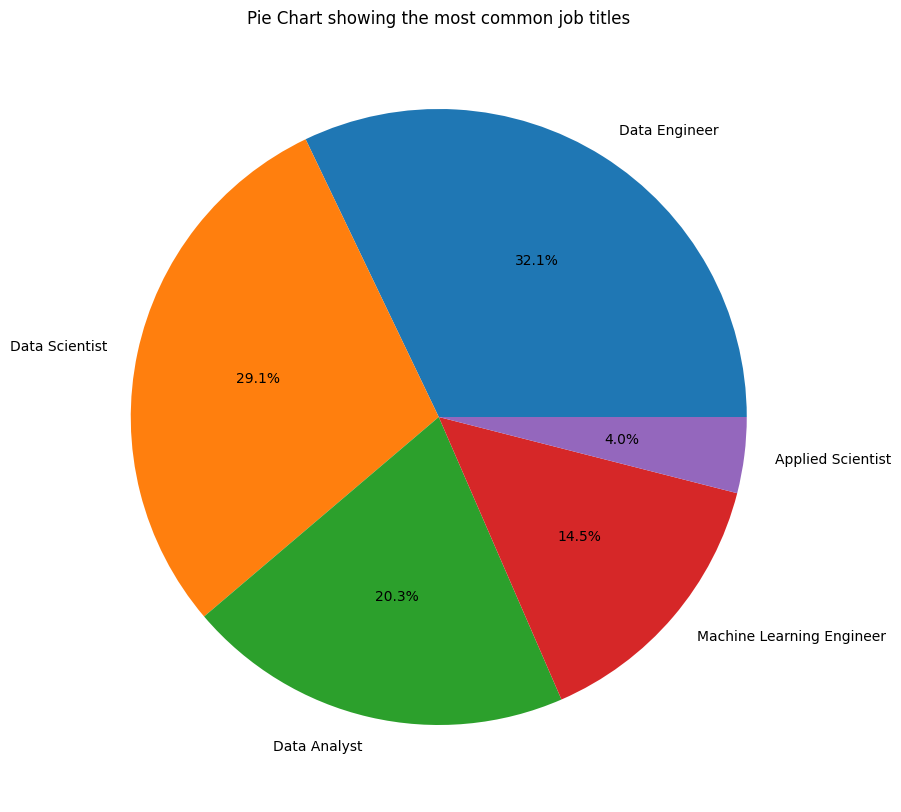

In [9]:
# ploting pie chart of job titles
plt.figure(figsize=(10,10))
plt.pie(common_job_titles,labels=common_job_titles.index,autopct='%1.1f%%')
plt.title("Pie Chart showing the most common job titles")
plt.show()

In [10]:
# Analysing salary by experience level
salary=df.groupby('experience_level')['salary'].agg(['mean','max','min','sum']).reset_index()
salary

,experience_level,mean,max,min,sum
0,Entry-level,89363.784274,300000,14000,44324437
1,Executive,188128.943060,416000,15000,52864233
2,Mid-level,115987.527555,450000,15000,216780689
3,Senior,162260.680578,412000,24000,1088606906


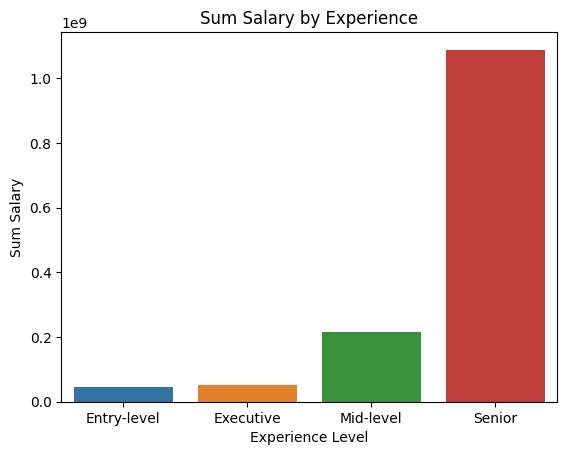

In [11]:
# Creating Barplot for Salary by experience level
sns.barplot(x='experience_level',y='sum',data=salary)
plt.title('Sum Salary by Experience')
plt.xlabel('Experience Level')
plt.ylabel('Sum Salary')
plt.show()


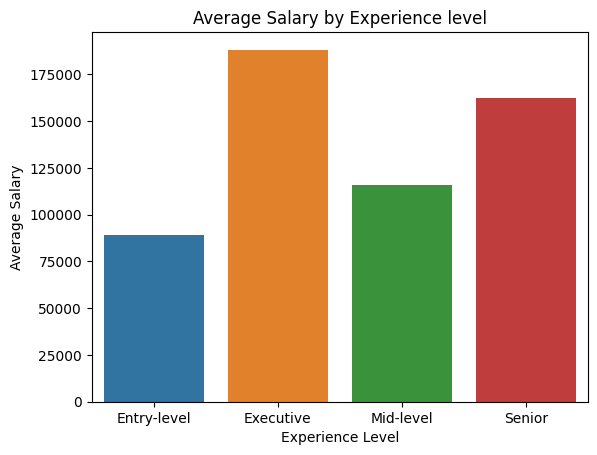

In [12]:
# Creating Barplot for Average salary by experience
sns.barplot(x='experience_level',y='mean',data=salary)
plt.title('Average Salary by Experience level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()

In [13]:
# Filter United Kingdom
uk=df[df['company_location']=='United Kingdom']
uk.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
13,2023,Data Scientist,Data Science and Research,GBP,35000,43064,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
14,2023,Data Scientist,Data Science and Research,GBP,30000,36912,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
67,2023,Data Engineer,Data Engineering,GBP,58000,71363,United Kingdom,Senior,Full-time,In-person,United Kingdom,M
68,2023,Data Engineer,Data Engineering,GBP,45000,55368,United Kingdom,Senior,Full-time,In-person,United Kingdom,M
123,2023,Data Quality Analyst,Data Quality and Operations,GBP,40000,49216,United Kingdom,Entry-level,Full-time,Remote,United Kingdom,M


In [14]:
# Identifying the trends of salary by employment type
# data needed
subset=uk[['work_year','employment_type','salary']]
subset.head()

,work_year,employment_type,salary
13,2023,Full-time,35000
14,2023,Full-time,30000
67,2023,Full-time,58000
68,2023,Full-time,45000
123,2023,Full-time,40000


In [15]:
# plot the trend
uk=uk[uk['employment_type']=='Full-time']
trend=subset.groupby('work_year')['salary'].sum()
trend=trend.reset_index()
trend

,work_year,salary
0,2020,333000
1,2021,884356
2,2022,6214060
3,2023,33644619


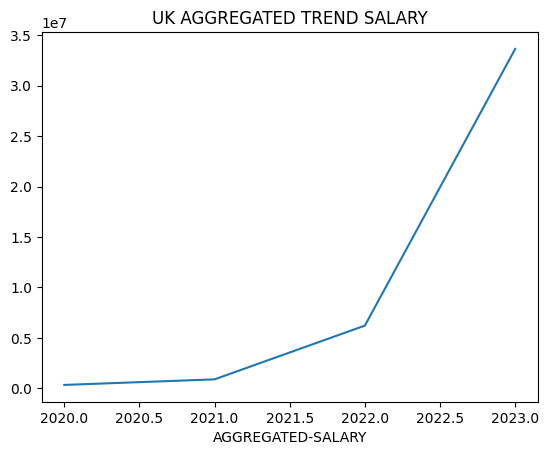

In [16]:
plt.plot(trend.work_year,trend.salary)
plt.title('UK AGGREGATED TREND SALARY')
plt.xlabel('AGGREGATED-SALARY')
plt.show()